In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr
import math

In [2]:
file_path = "./"
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size'] = 12

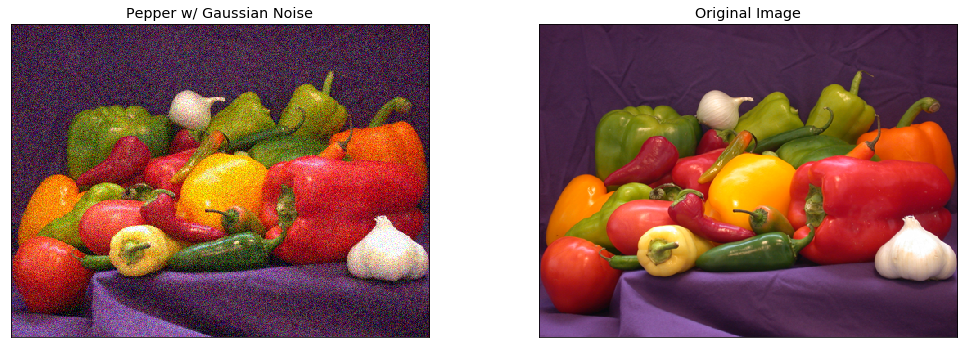

In [3]:
# load both clean and gaussian noisy image
noisy_image_path = file_path + "gaussian_noise_peppers.png" 
clean_image_path = file_path + "peppers.png"
noisy_pepper = cv2.imread(noisy_image_path)
pepper = cv2.imread(clean_image_path)

# to plot our images, we convert from BGR to RBG
reg_img = cv2.cvtColor(pepper, cv2.COLOR_BGR2RGB)
noisy_img = cv2.cvtColor(noisy_pepper, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(noisy_img)
plt.title("Pepper w/ Gaussian Noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(reg_img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### 1. Filtering image with a 7x7 Gaussian with variance 2

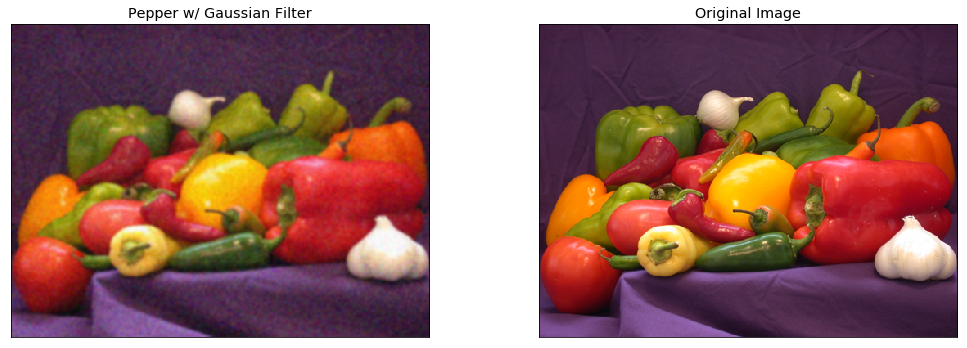

In [4]:
# We apply a gaussian blur of std = sqrt(2)
gaussian_blur_img = cv2.GaussianBlur(noisy_pepper, (7, 7), math.sqrt(2))

# To plot our image we convert from BGR to RGB
gaussian_img_RGB = cv2.cvtColor(gaussian_blur_img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(gaussian_img_RGB)
plt.title("Pepper w/ Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(reg_img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 2. Filtering image with a 7x7 Box Filter

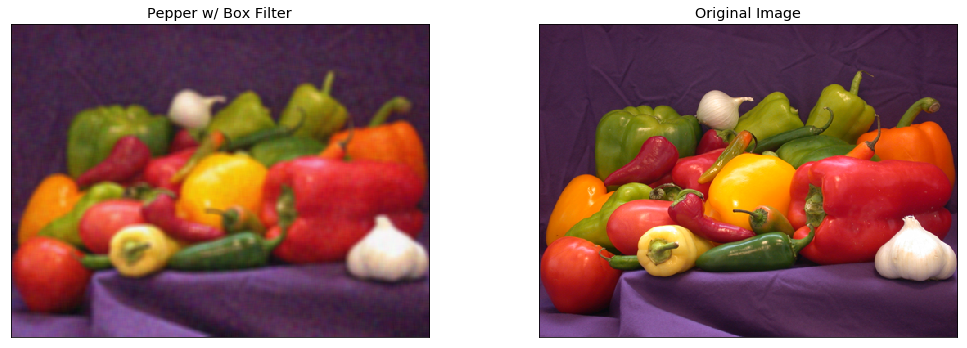

In [5]:
# We filter using a 7x7 box filter
kernel = np.ones((7,7), np.float32)/(7*7)
# the value -1 indicates that our anchor point is at kernel center
box_img = cv2.filter2D(noisy_pepper, -1, kernel)

# To plot the image we convert from BGR to RGB
box_img_RGB = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(box_img_RGB)
plt.title("Pepper w/ Box Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(reg_img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 3. Compare PSNR of denoised vs clean image

In [6]:
list(zip(["Gaussian", "Box"], [compare_psnr(reg_img, gaussian_img_RGB), compare_psnr(reg_img, box_img_RGB)]))

[('Gaussian', 29.87927167099926), ('Box', 28.278396476904042)]

| Filter Type (7x7) 	|  PSNR  	|
|:-----------------:	|:------:	|
|      Gaussian     	| 29.879 	|
|        Box        	| 28.278 	|

The superior result was given by using the <b>Gaussian Filter</b>. This can be seen in the table above, in the superior PSNR value of Gaussian filter. A higher PSNR value indicates that there is less noise in the signal and therefore is better. 

### 4. Filter noisy image using Gaussian AND 5. Filter noisy image using Median

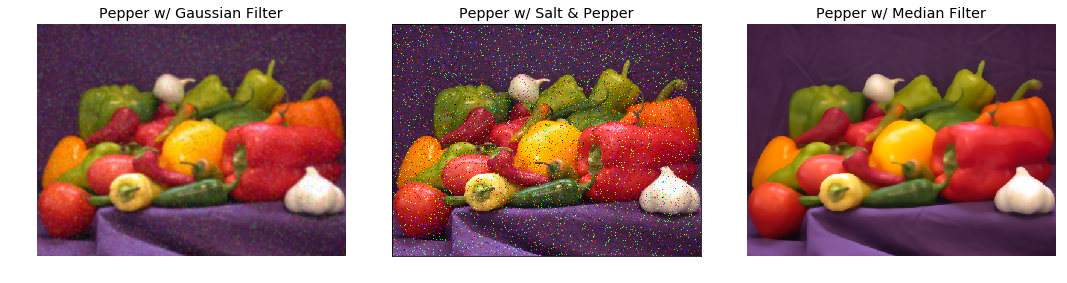

In [7]:
# We load the salt and pepper images
sp_image_path = file_path + "saltandpepper_noise_peppers.png"
sp_pepper = cv2.imread(sp_image_path)
sp_RGB = cv2.cvtColor(sp_pepper, cv2.COLOR_BGR2RGB)

sp_gaussian_RGB = cv2.GaussianBlur(sp_RGB, (7, 7), math.sqrt(2))
sp_median_RGB = cv2.medianBlur(sp_RGB, 7)

plt.subplot(131), plt.imshow(sp_gaussian_RGB)
plt.title("Pepper w/ Gaussian Filter"), plt.axis("off")
plt.subplot(133), plt.imshow(sp_median_RGB)
plt.title("Pepper w/ Median Filter"), plt.axis("off")
plt.subplot(132), plt.imshow(sp_RGB)
plt.title("Pepper w/ Salt & Pepper"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 6. Compare PSNR of denoised to clean

In [8]:
list(zip(["Gaussian", "Median"], [compare_psnr(reg_img, sp_gaussian_RGB), compare_psnr(reg_img, sp_median_RGB)]))

[('Gaussian', 28.1671611567447), ('Median', 31.871009920638333)]

| Filter Type (7x7) 	|  PSNR  	|
|:-----------------:	|:------:	|
|      Gaussian     	| 28.167 	|
|       Median      	| 31.871 	|

The superior result was given by using the <b>Median Filter</b>. This can be seen in the table above, in the superior PSNR value of Median filter compared to the other methods. 

#### Through analysis, it is seen that a Gaussian filter is better for Gaussian noise and a median filter is better for salt and pepper noise.